In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
import torch
from embodied_active_learning.utils import pytorch_utils

In [12]:
  
        testsetFolder = "/home/rene/thesis/test_single_flat"
        testLoader = torch.utils.data.DataLoader(
          pytorch_utils.DataLoader.DataLoaderSegmentation(testsetFolder, transform=None, num_imgs=120,
                                                          verbose=False),
          batch_size=8)

In [13]:
for e in testLoader:
    break

In [14]:
plt.imshow

{'image': tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.9294, 0.9373, 0.9333],
           [0.0510, 0.0000, 0.0000,  ..., 0.9294, 0.9373, 0.9412],
           [0.0000, 0.0000, 0.0000,  ..., 0.9333, 0.9373, 0.9373],
           ...,
           [0.3176, 0.3373, 0.3333,  ..., 0.8235, 0.8196, 0.8275],
           [0.3255, 0.3176, 0.3255,  ..., 0.8314, 0.8314, 0.8275],
           [0.2941, 0.2941, 0.3020,  ..., 0.8392, 0.8235, 0.8235]],
 
          [[0.0000, 0.0000, 0.0000,  ..., 0.9098, 0.9216, 0.9176],
           [0.0000, 0.0000, 0.0000,  ..., 0.9098, 0.9176, 0.9216],
           [0.0000, 0.0000, 0.0000,  ..., 0.9137, 0.9216, 0.9216],
           ...,
           [0.1098, 0.1333, 0.1098,  ..., 0.6078, 0.6000, 0.6078],
           [0.1098, 0.1098, 0.1098,  ..., 0.6118, 0.6078, 0.5922],
           [0.0863, 0.0863, 0.1098,  ..., 0.6157, 0.6039, 0.5922]],
 
          [[0.0000, 0.0000, 0.0000,  ..., 0.8941, 0.9020, 0.9020],
           [0.0000, 0.0000, 0.0000,  ..., 0.8941, 0.9020, 0.9059],
           [0.0

In [3]:
import glob

In [16]:
from embodied_active_learning.airsim_utils import semantics

In [17]:

pathToAirsimMapping = '/home/rene/catkin_ws/src/active_learning_for_segmentation/embodied_active_learning/cfg/airsim/semanticClassesFlat.yaml'

In [19]:
converter = semantics.AirSimSemanticsConverter(path_to_airsim_mapping=pathToAirsimMapping)

In [53]:
import torch

In [51]:
cp = "/home/rene/Downloads/refinenet_scannet_best_new.pth"

In [58]:
from semseg_density.model.refinenet import rf_lw50, rf_lw101, rf_lw152
model = rf_lw50(40, pretrained=True, groupnorm = True)
try:
    model.load_state_dict(torch.load(cp))
except Exception as e:
    print("Could not load model checkpoint. Going to try data parallel checkpoint")

    try:
      net = torch.nn.DataParallel(model)
      net.load_state_dict(torch.load(cp))
      model = net.module
    except Exception as e:
        print(e)


Could not load model checkpoint. Going to try data parallel checkpoint


In [88]:
model = model.cuda()
model = model.eval()

/home/rene/thesis/test_single_flat/img_0014.png /home/rene/thesis/test_single_flat/mask_0014.png


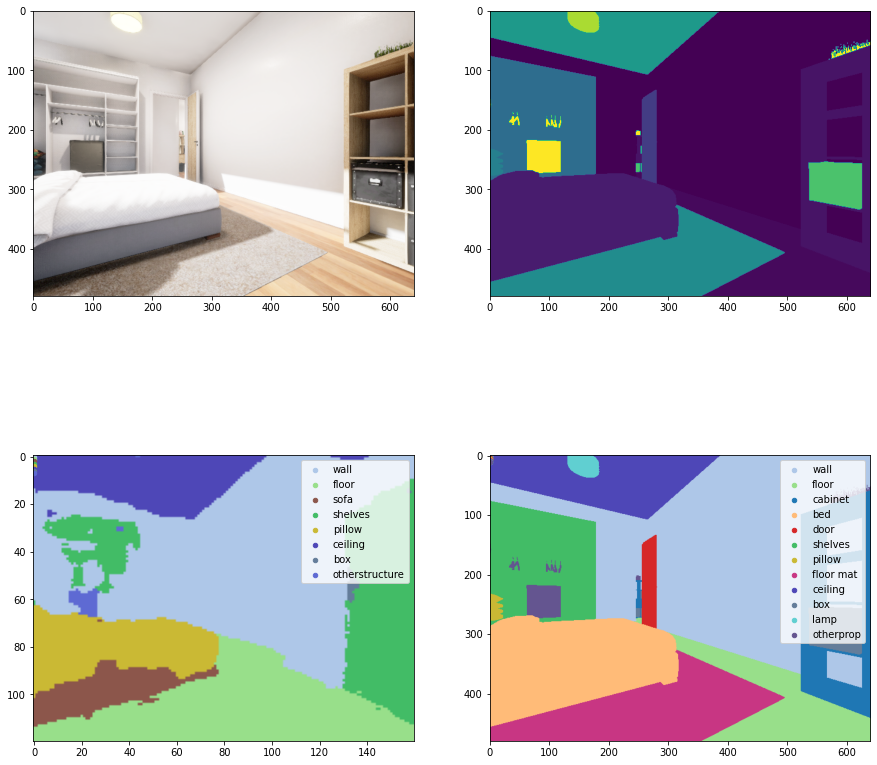

/home/rene/thesis/test_single_flat/img_0007.png /home/rene/thesis/test_single_flat/mask_0007.png


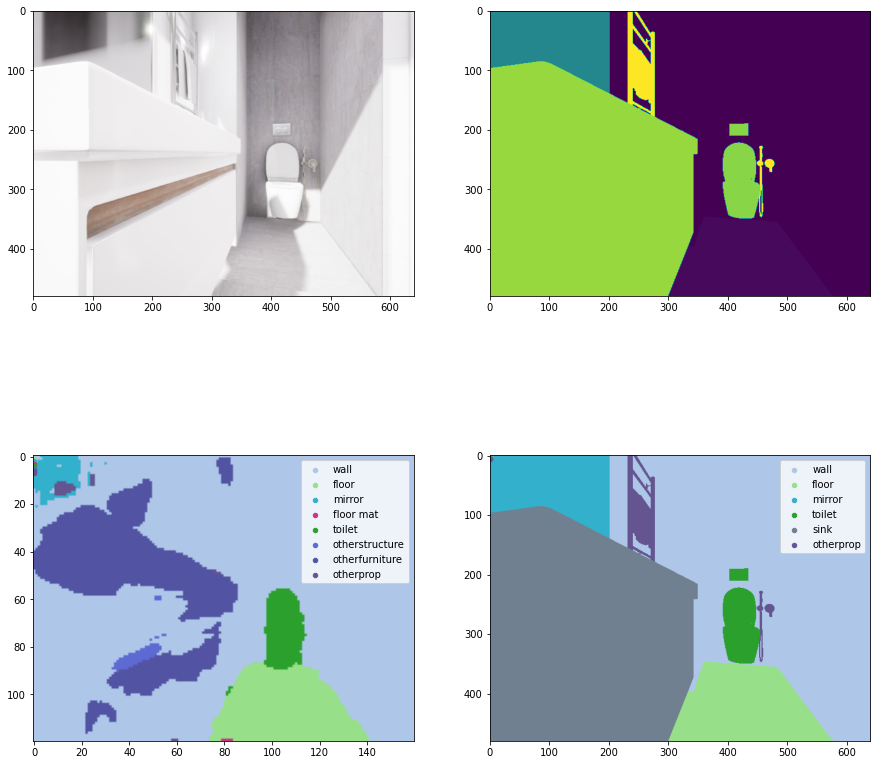

/home/rene/thesis/test_single_flat/img_0003.png /home/rene/thesis/test_single_flat/mask_0003.png


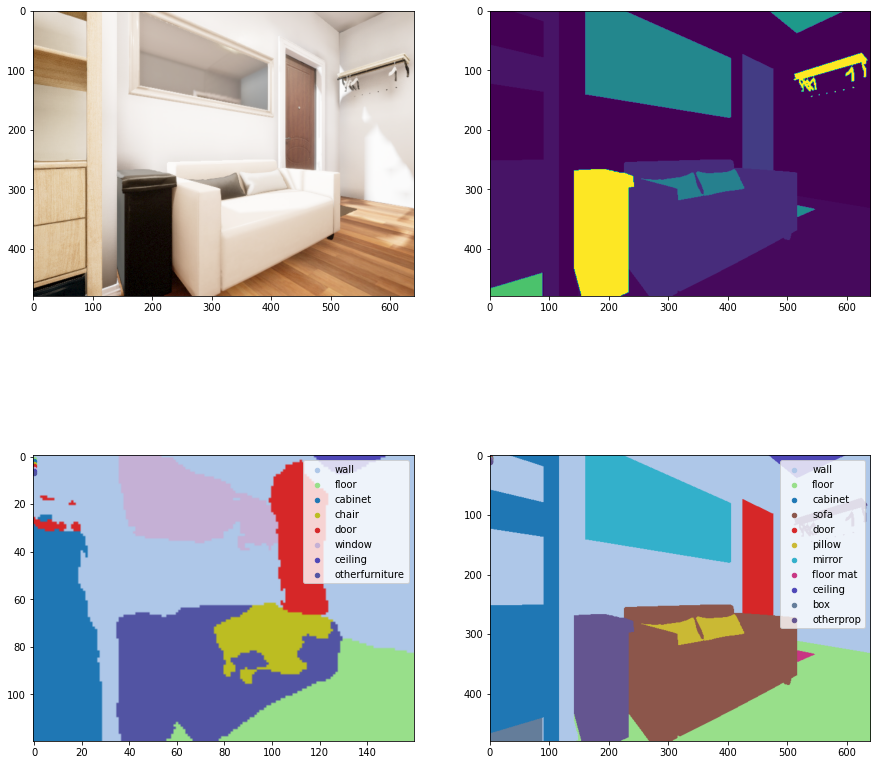

/home/rene/thesis/test_single_flat/img_0010.png /home/rene/thesis/test_single_flat/mask_0010.png


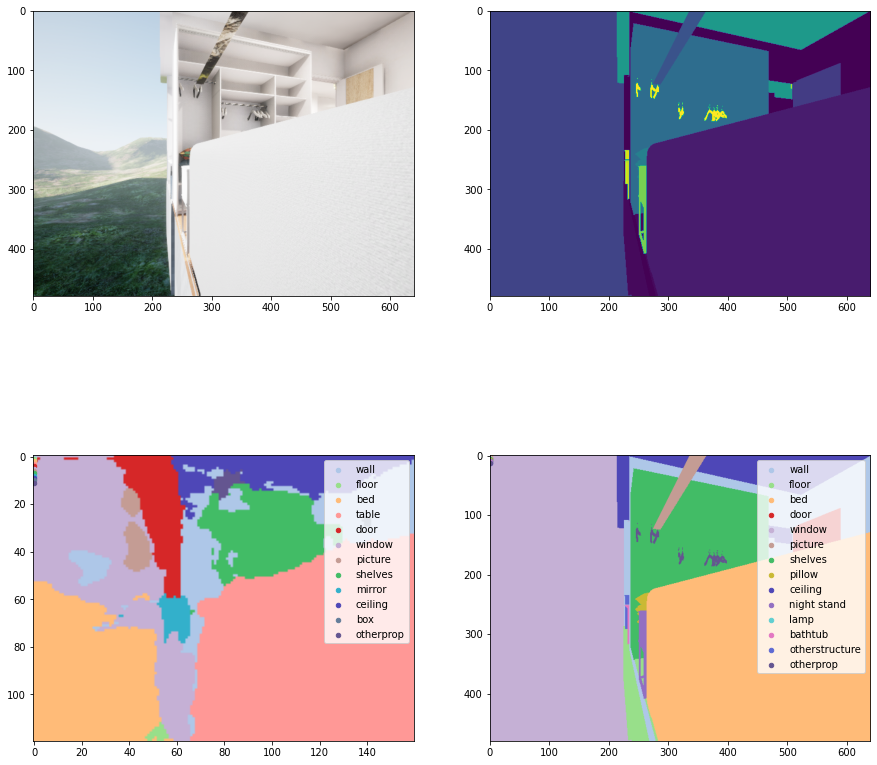

/home/rene/thesis/test_single_flat/img_0017.png /home/rene/thesis/test_single_flat/mask_0017.png


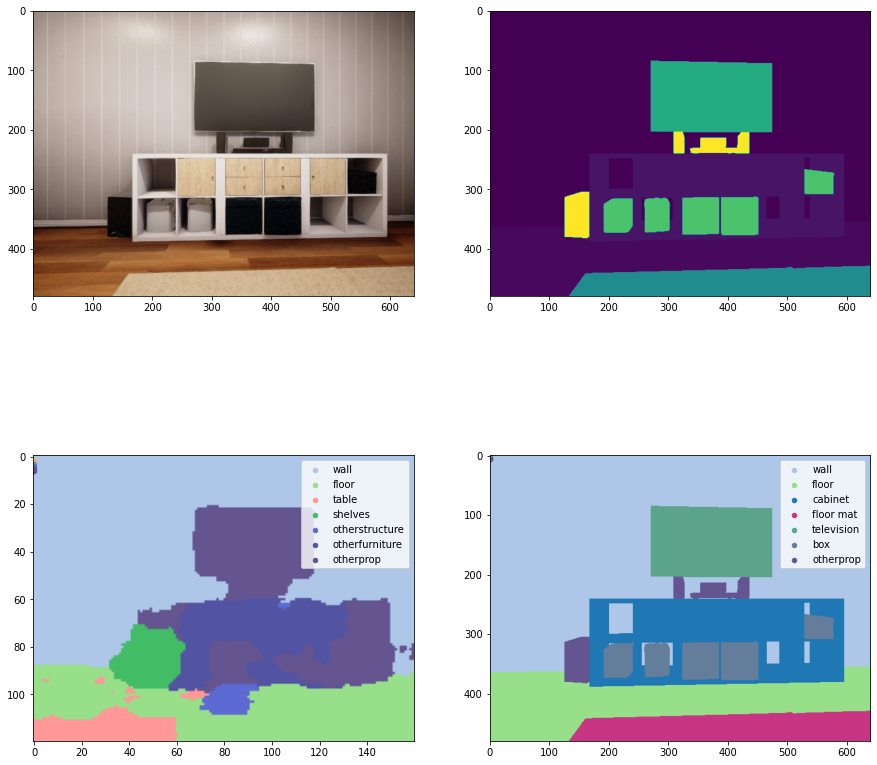

/home/rene/thesis/test_single_flat/img_0013.png /home/rene/thesis/test_single_flat/mask_0013.png


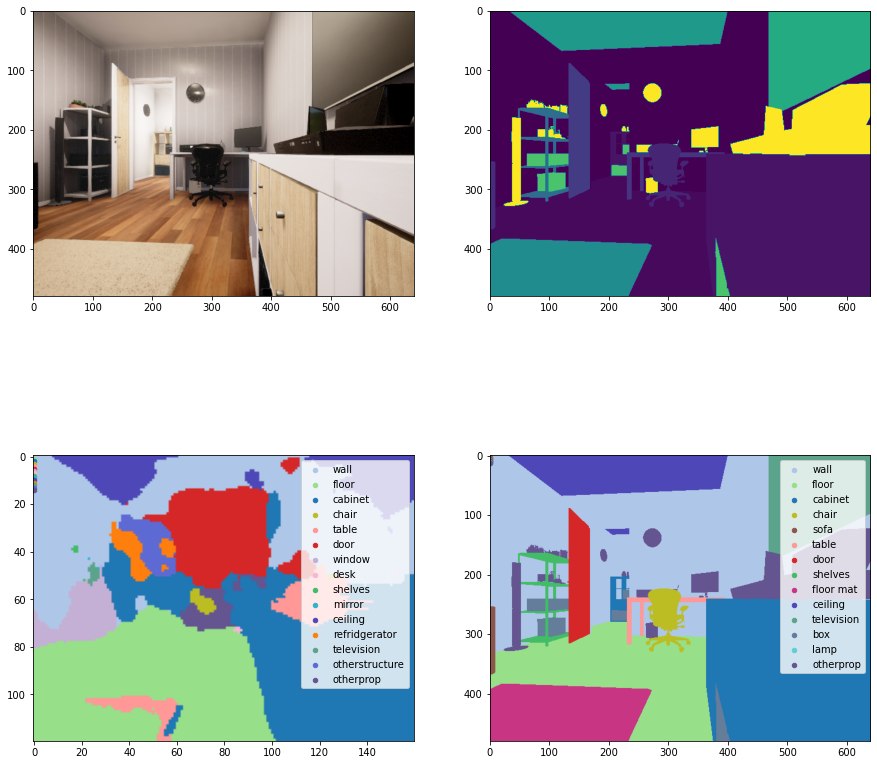

/home/rene/thesis/test_single_flat/img_0005.png /home/rene/thesis/test_single_flat/mask_0005.png


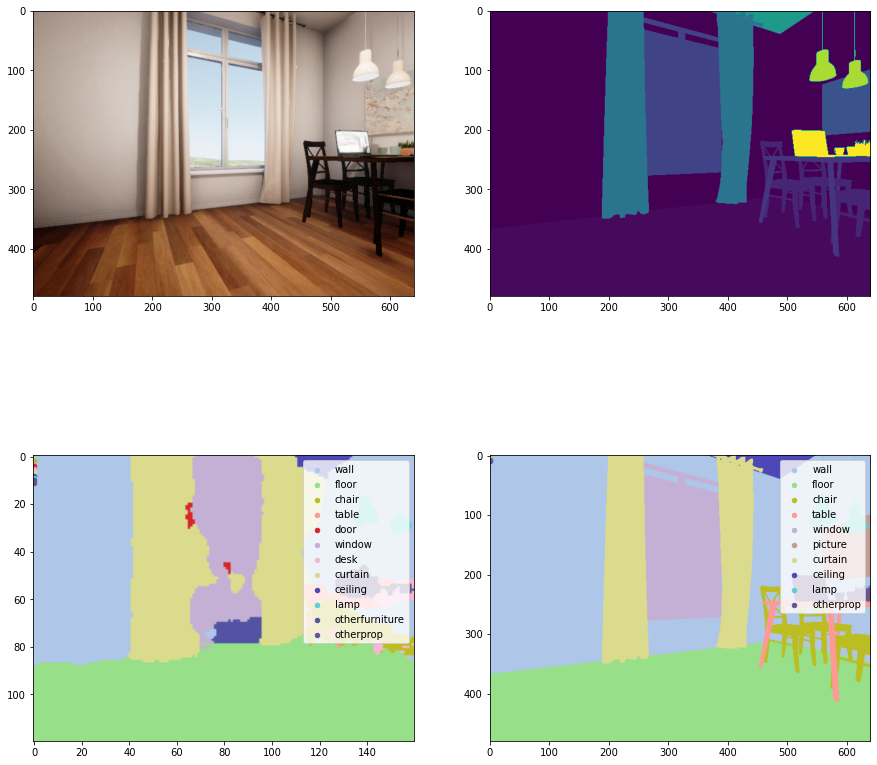

/home/rene/thesis/test_single_flat/img_0018.png /home/rene/thesis/test_single_flat/mask_0018.png


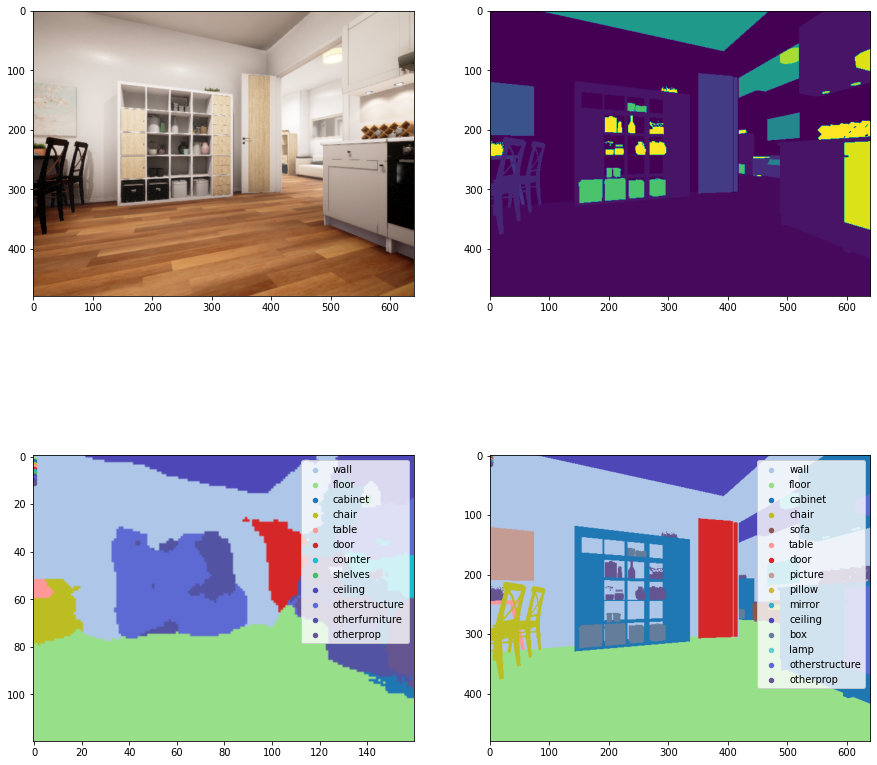

/home/rene/thesis/test_single_flat/img_0016.png /home/rene/thesis/test_single_flat/mask_0016.png


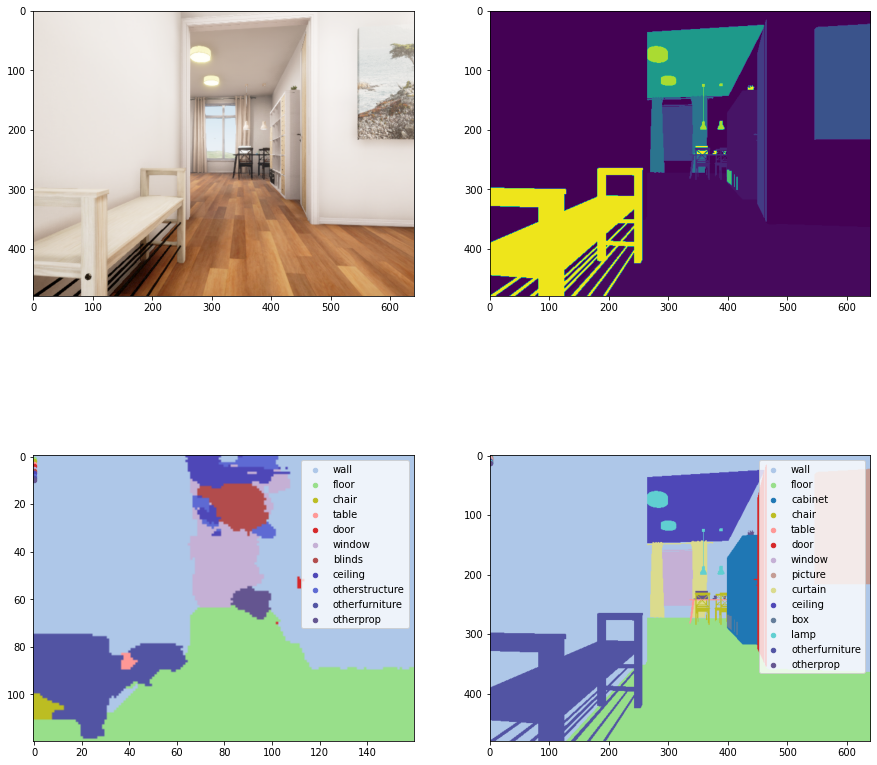

/home/rene/thesis/test_single_flat/img_0004.png /home/rene/thesis/test_single_flat/mask_0004.png


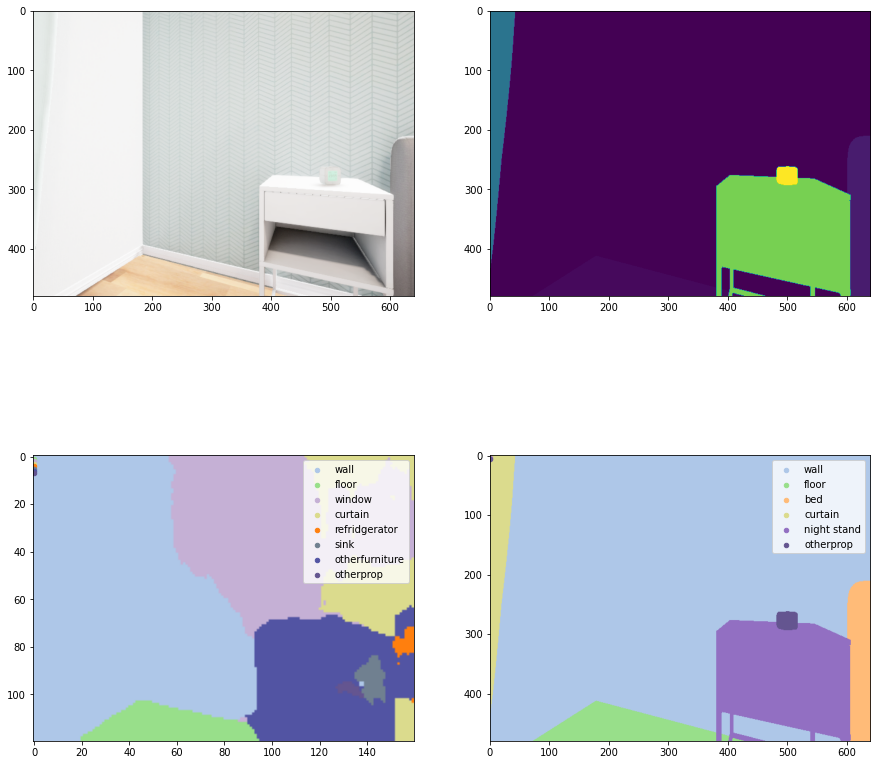

/home/rene/thesis/test_single_flat/img_0002.png /home/rene/thesis/test_single_flat/mask_0002.png


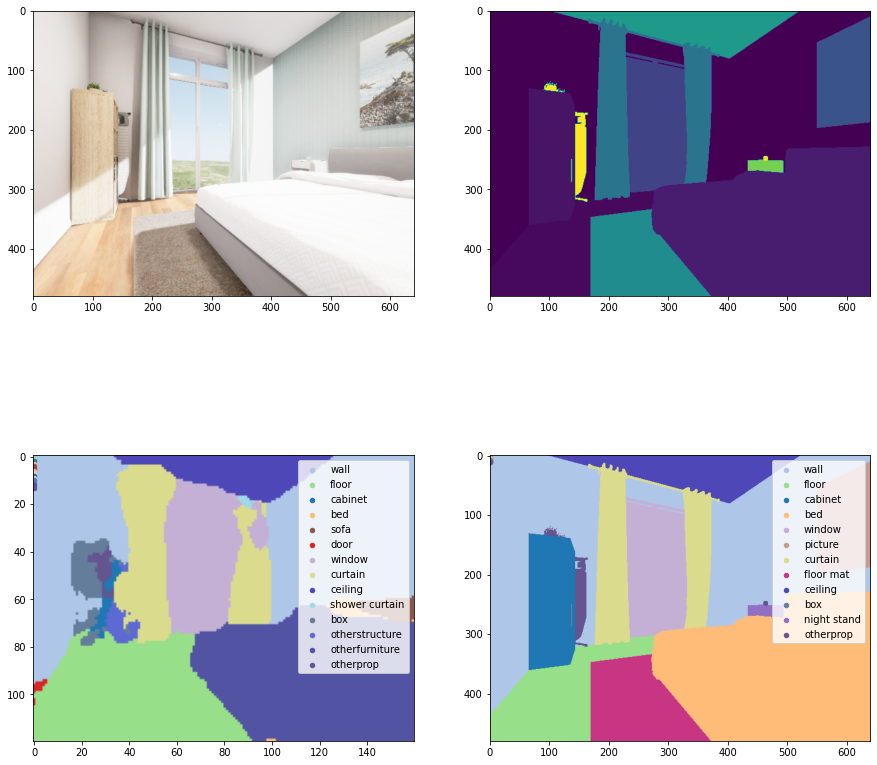

/home/rene/thesis/test_single_flat/img_0009.png /home/rene/thesis/test_single_flat/mask_0009.png


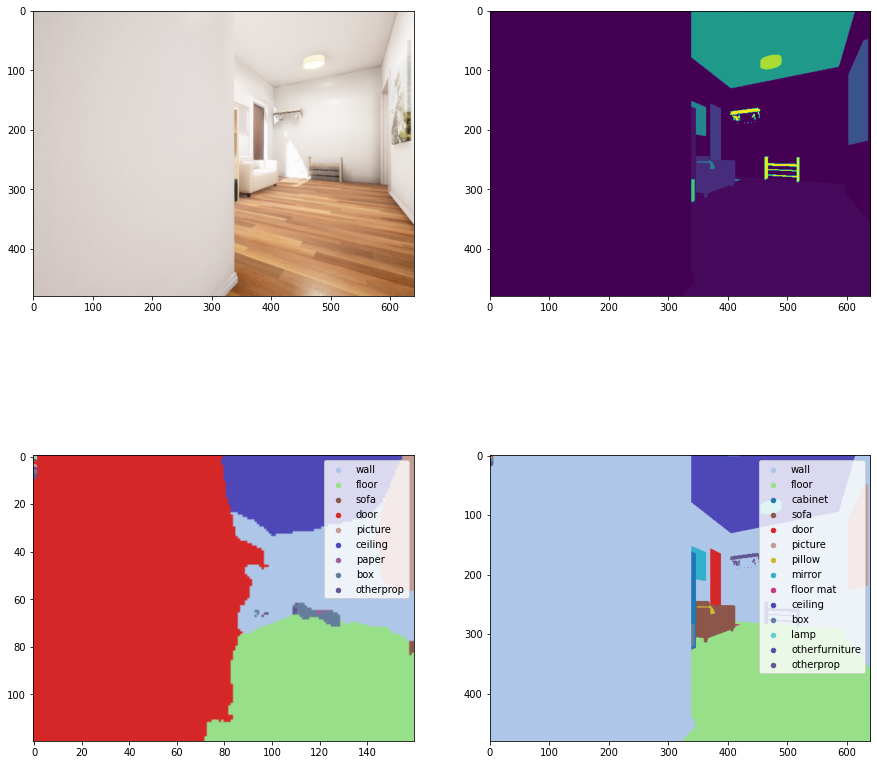

/home/rene/thesis/test_single_flat/img_0006.png /home/rene/thesis/test_single_flat/mask_0006.png


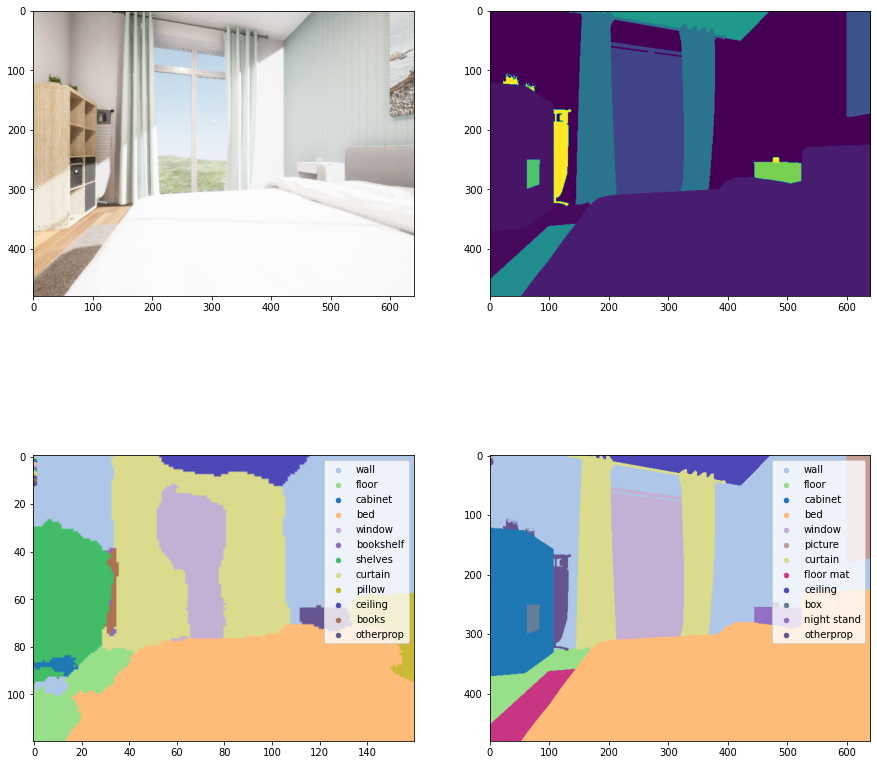

/home/rene/thesis/test_single_flat/img_0015.png /home/rene/thesis/test_single_flat/mask_0015.png


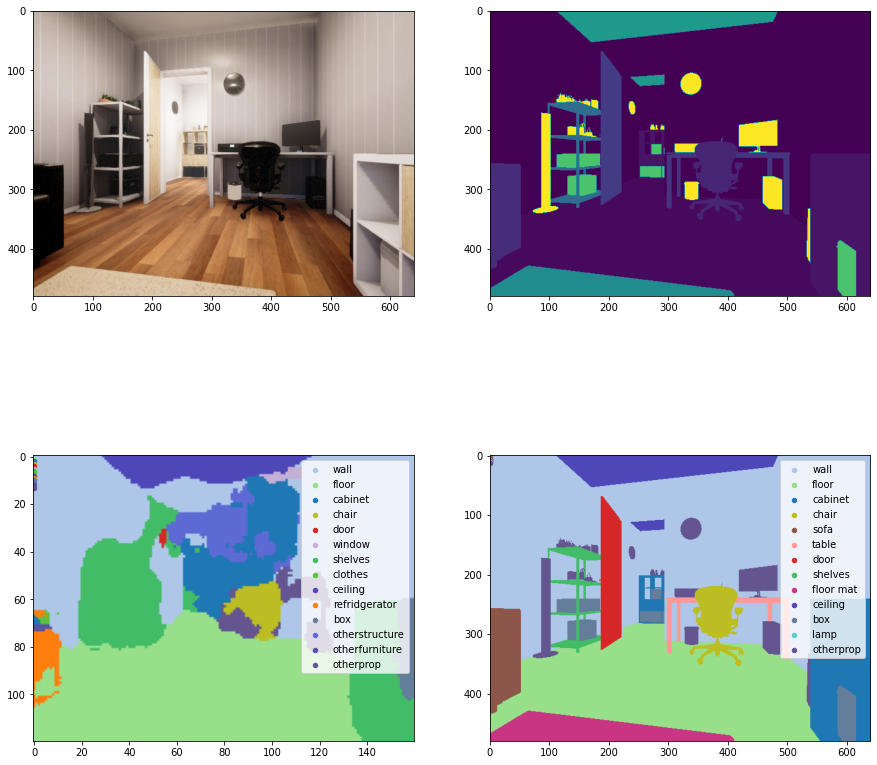

/home/rene/thesis/test_single_flat/img_0008.png /home/rene/thesis/test_single_flat/mask_0008.png


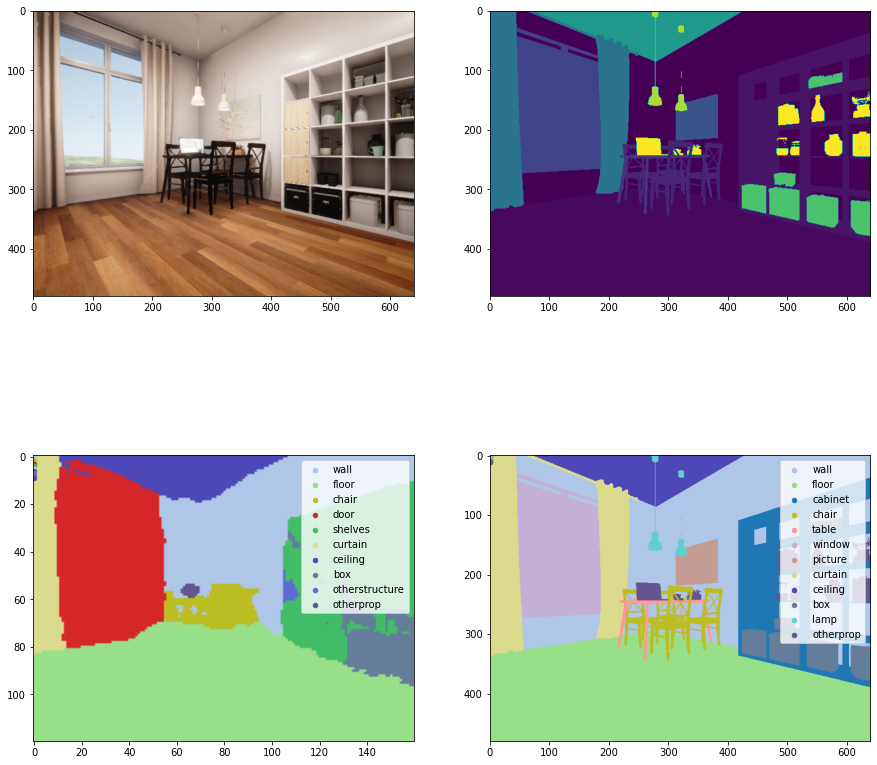

/home/rene/thesis/test_single_flat/img_0011.png /home/rene/thesis/test_single_flat/mask_0011.png


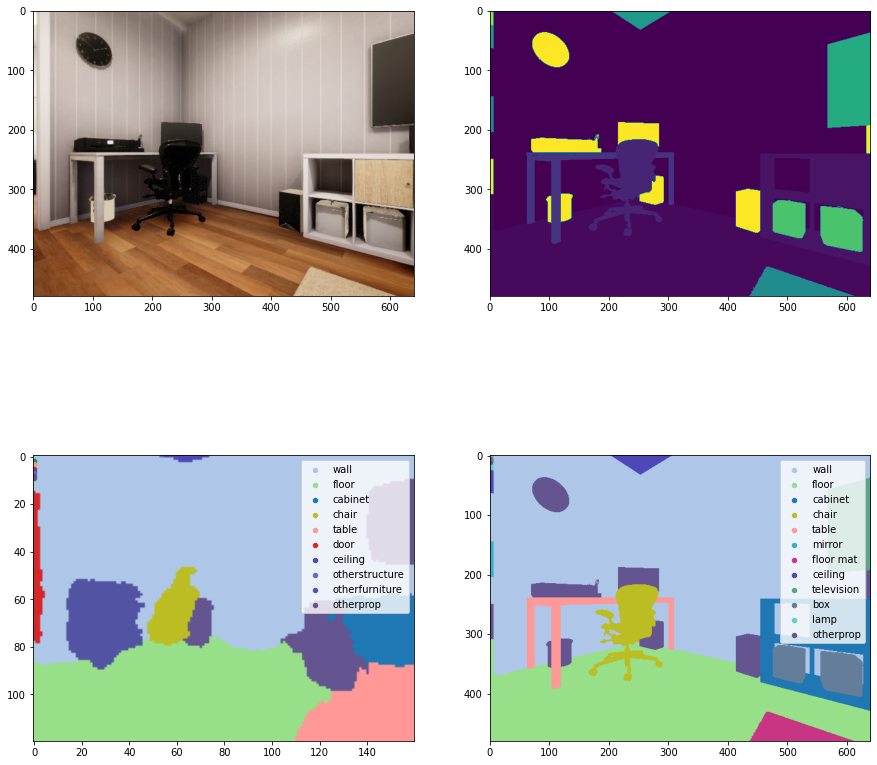

/home/rene/thesis/test_single_flat/img_0001.png /home/rene/thesis/test_single_flat/mask_0001.png


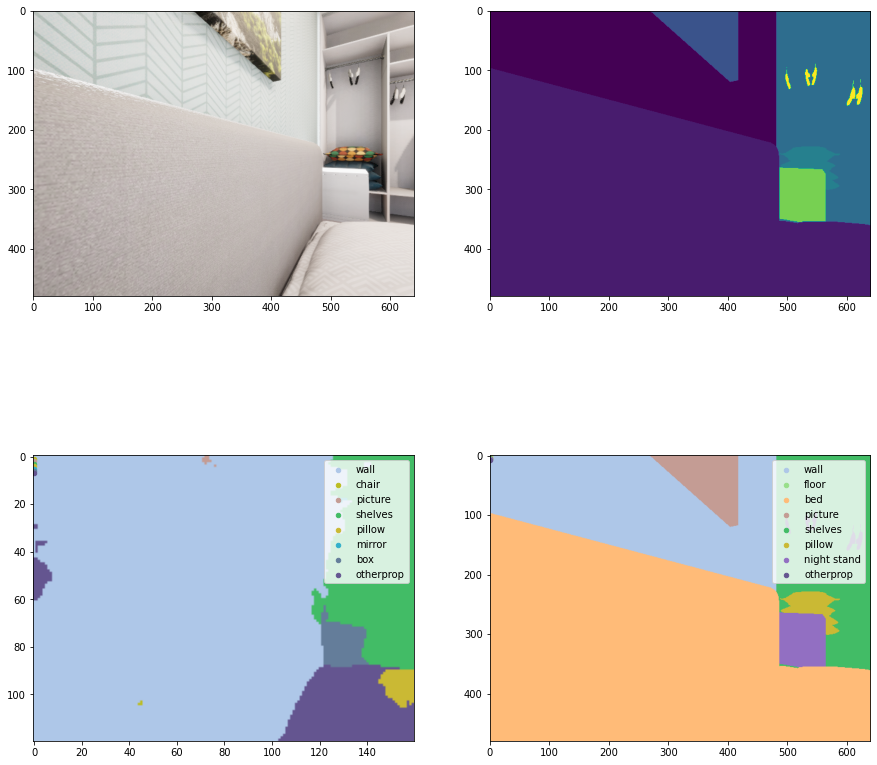

/home/rene/thesis/test_single_flat/img_0012.png /home/rene/thesis/test_single_flat/mask_0012.png


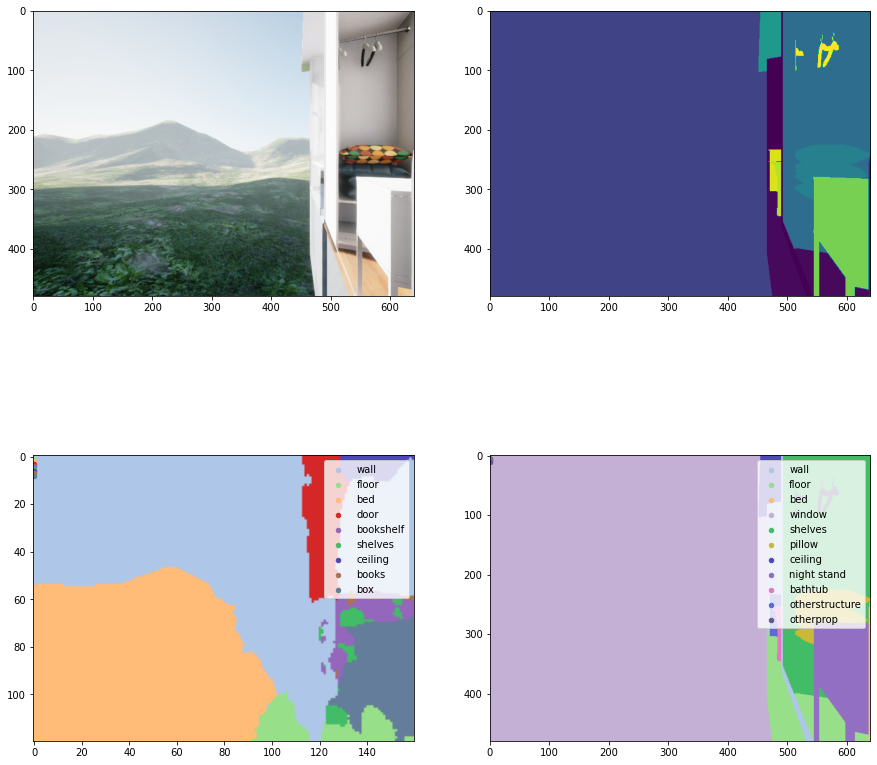

In [90]:
for img_file in glob.glob("/home/rene/thesis/test_single_flat/img_*"):
    mask_file = img_file.replace("img_", "mask_")
    print(img_file, mask_file)
    mask = np.asarray(Image.open(mask_file))
    img = np.asarray(Image.open(img_file))
    plt.subplot(2,2,1)
    plt.imshow(img)
    plt.subplot(2,2,2)
    plt.imshow(mask)
    plt.subplot(2,2,3)
    
    img_in_torch = torch.from_numpy((img[:,:,:-1] / 255).transpose(2,0,1)).unsqueeze(0)
    pred = np.argmax(model(img_in_torch.float().cuda()).cpu().detach().numpy().squeeze(), axis = 0)
    plt.imshow(converter.semantic_prediction_to_nyu_color(pred))
    for pos, idx in enumerate(np.unique(pred)):
        col = [*converter.semantic_prediction_to_nyu_color(np.asarray(idx))/255]
        plt.scatter(0, pos,s = 20, color = (col[0], col[1], col[2]), label = converter.nyu_id_to_name[idx])
    plt.legend()
    plt.subplot(2,2,4)
    plt.imshow(converter.semantic_prediction_to_nyu_color(mask))
    
    plt.subplot(2,2,4)
    for pos, idx in enumerate(np.unique(mask)):
        col = [*converter.semantic_prediction_to_nyu_color(np.asarray(idx))/255]
        plt.scatter(0, pos,s = 20, color = (col[0], col[1], col[2]), label = converter.nyu_id_to_name[idx])
    plt.legend()
    plt.gcf().set_size_inches(15,15)
    plt.show()

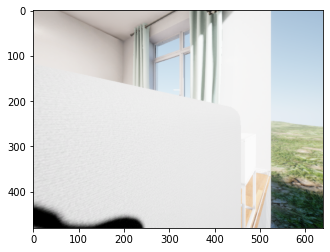

In [12]:
plt.imshow(img)